In [15]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [157]:
lyrics_df = pd.read_csv('lyrics_metrics.csv')
df_info = pd.read_csv('track_artist_audio_features_cleaned.csv')

In [139]:
popularity_id_df = df_info[['track_id', 'song_popularity']]

In [236]:
popularity_id_df.head()

,track_id,song_popularity
0,2yLa0QULdQr0qAIvVwN6B5,74
1,4Vxu50qVrQcycjRyJQaZLC,65
2,6b8Be6ljOzmkOmFslEb23P,79
3,0afhq8XCExXpqazXczTSve,79
4,1HNkqx9Ahdgi1Ixy2xkKkL,84


In [159]:
metrics_df = pd.concat([lyrics_df, popularity_id_df], axis=1, join='inner')

In [235]:
metrics_df.head()

,song,artist_name,lyrics,artist_id,track_id,repetitions_rate,mean_sentence_len,mean_word_len,unique_words_rate,total_words,...,count_word_the,count_word_go,count_word_time,count_word_get,count_word_me,count_word_when,count_word_come,count_word_all,track_id,song_popularity
0,(You Drive Me) Crazy,Britney Spears,"Crazy\nOh, oh\n\nBaby, I'm so into you\nYou go...",26dSoYclwsYLMAKD3tpOr4,1DSJNBNhGZCigg9ll5VeZv,30.41,31.68,4.98,0.15,271.0,...,4.0,0.0,1.0,0.0,17.0,0.0,0.0,5.0,2yLa0QULdQr0qAIvVwN6B5,74
1,100 Years,Five For Fighting,I'm 15 for a moment\nCaught in between 10 and ...,7FgMLbnZVrEnir95O0YujA,2lFlveK1y13WWp3vnQtrr3,29.66,26.55,4.43,0.23,281.0,...,7.0,0.0,11.0,0.0,0.0,3.0,0.0,1.0,4Vxu50qVrQcycjRyJQaZLC,65
2,11 Blocks,Wrabel,11 blocks from my door to your doorstep\nThree...,7r2uG6BlFXKcwmh9ItqlII,7nZBRPj89rgeZ5eBLp2J7P,38.60,33.20,4.95,0.19,345.0,...,7.0,0.0,0.0,2.0,4.0,4.0,0.0,0.0,6b8Be6ljOzmkOmFslEb23P,79
3,1985,Bowling For Soup,"Debbie just hit the wall, she never had it all...",5ND0mGcL9SKSjWIjPd0xIb,5oQcOu1omDykbIPSdSQQNJ,36.77,48.19,4.94,0.31,343.0,...,9.0,0.0,1.0,1.0,0.0,4.0,0.0,2.0,0afhq8XCExXpqazXczTSve,79
4,2002,Anne-Marie,I will always remember\nThe day you kissed my ...,1zNqDE7qDGCsyzJwohVaoX,2BgEsaKNfHUdlh97KmvFyo,44.02,28.54,4.95,0.19,387.0,...,26.0,3.0,3.0,0.0,9.0,4.0,0.0,4.0,1HNkqx9Ahdgi1Ixy2xkKkL,84


In [161]:
metrics_df[['repetitions_rate', 
        'mean_sentence_len',
        'mean_word_len',
        'unique_words_rate',
        'total_words',
        'total_char',
        'song_popularity']].describe().applymap(lambda x: f"{x:0.2f}")

,repetitions_rate,mean_sentence_len,mean_word_len,unique_words_rate,total_words,total_char,song_popularity
count,4391.00,4391.00,4391.00,4391.00,4391.00,4391.00,4391.00
mean,38.51,31.72,5.06,0.22,312.46,1120.55,56.11
std,13.96,11.11,0.39,0.09,162.68,593.71,17.32
min,2.40,10.50,3.00,0.01,5.00,14.00,1.00
25%,29.00,26.18,4.82,0.16,211.00,761.00,46.00
50%,37.24,30.82,5.05,0.21,288.00,1025.00,59.00
75%,46.56,36.00,5.28,0.26,377.00,1342.50,69.00
max,239.14,470.00,11.00,0.81,2787.00,10823.00,90.00


In [185]:
def remove_outliers(df, column_name):
    rep_rate = df[column_name]
    q1 = rep_rate.quantile(0.25)
    q3 = rep_rate.quantile(0.75)
    iq = q3 - q1

    upper_outlier = q3 + 3*iq
    lower_outlier = q1 - 3*iq
    
    return df[(df[column_name] > lower_outlier) & (df[column_name] < upper_outlier)]

In [188]:
def plot_figure(df, col_name):
    df_no_outliers = remove_outliers(df, col_name)
    
    plt.figure(figsize = (9,9))
    plt.scatter(df_no_outliers[col_name], df_no_outliers['song_popularity'], marker='o')
    plt.xlabel(col_name)
    plt.ylabel('song_popularuty')

    plt.title(col_name.capitalize().replace('_', ' '))

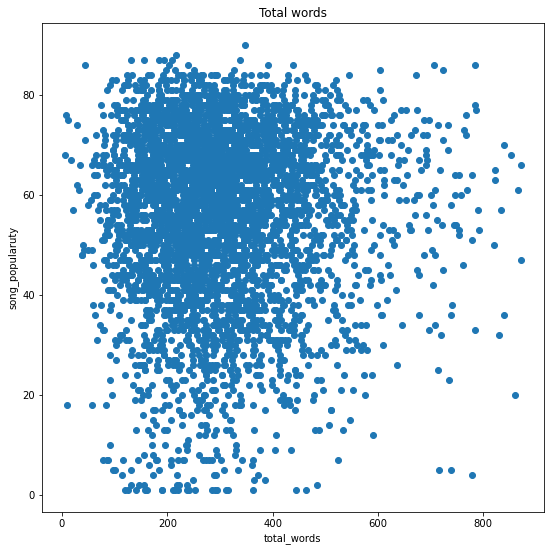

In [189]:
# total_words
plot_figure(metrics_df, 'total_words')

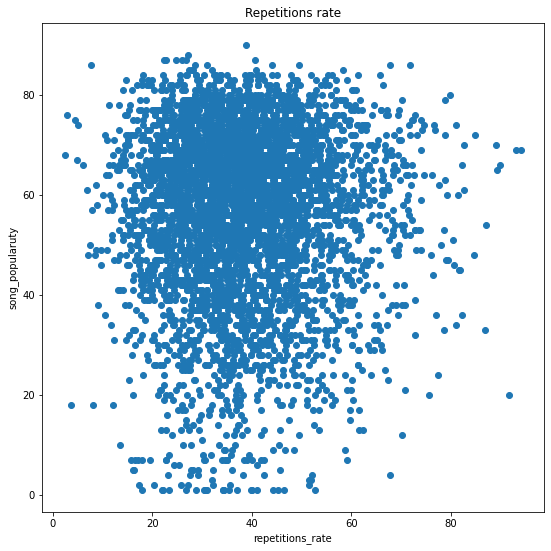

In [190]:
# repetitions_rate

plot_figure(metrics_df, 'repetitions_rate')
              

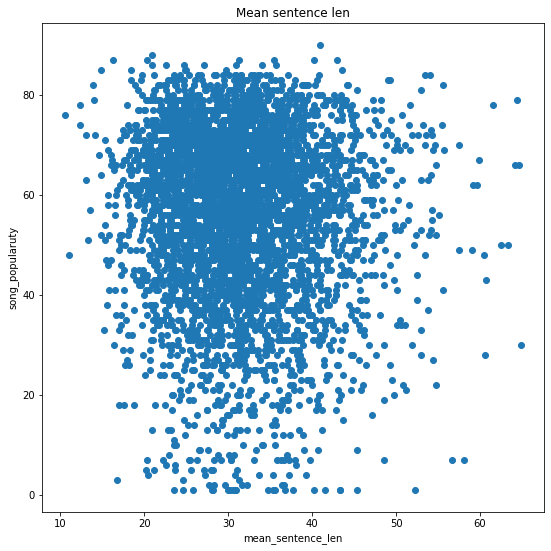

In [191]:
# mean_sentence_len

plot_figure(metrics_df, 'mean_sentence_len')

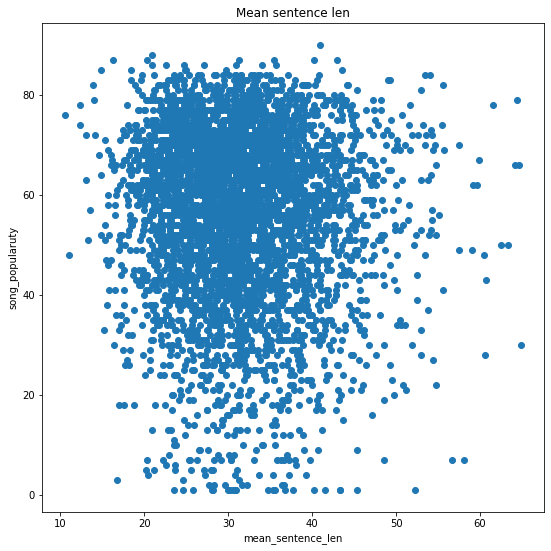

In [192]:
# mean_word_len

plot_figure(metrics_df, 'mean_sentence_len')

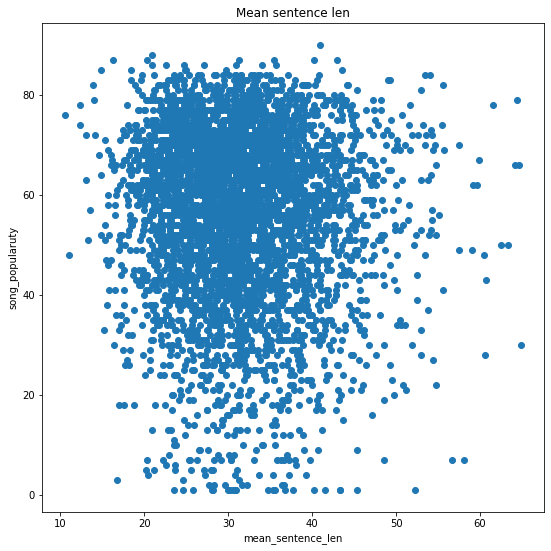

In [193]:
# unique_words_rate

plot_figure(metrics_df, 'mean_sentence_len')

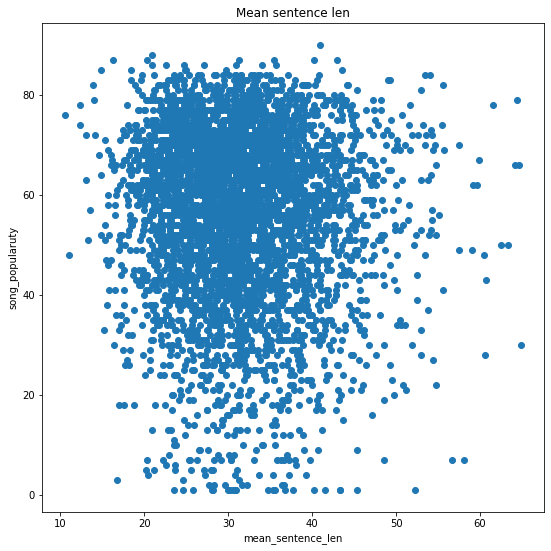

In [194]:
# total_char

plot_figure(metrics_df, 'mean_sentence_len')

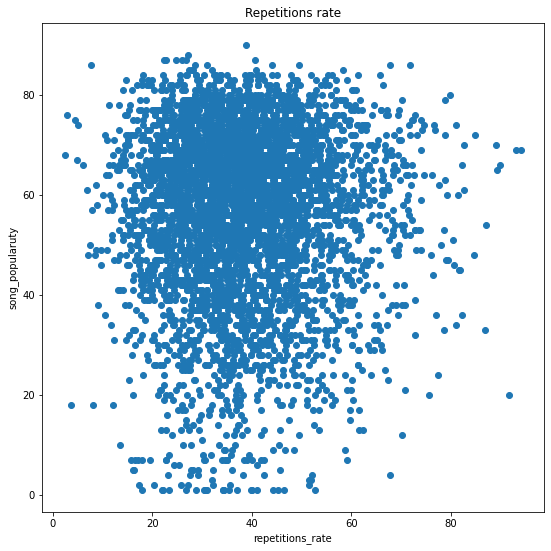

In [155]:
plot_figure(no_outliers, 'repetitions_rate')



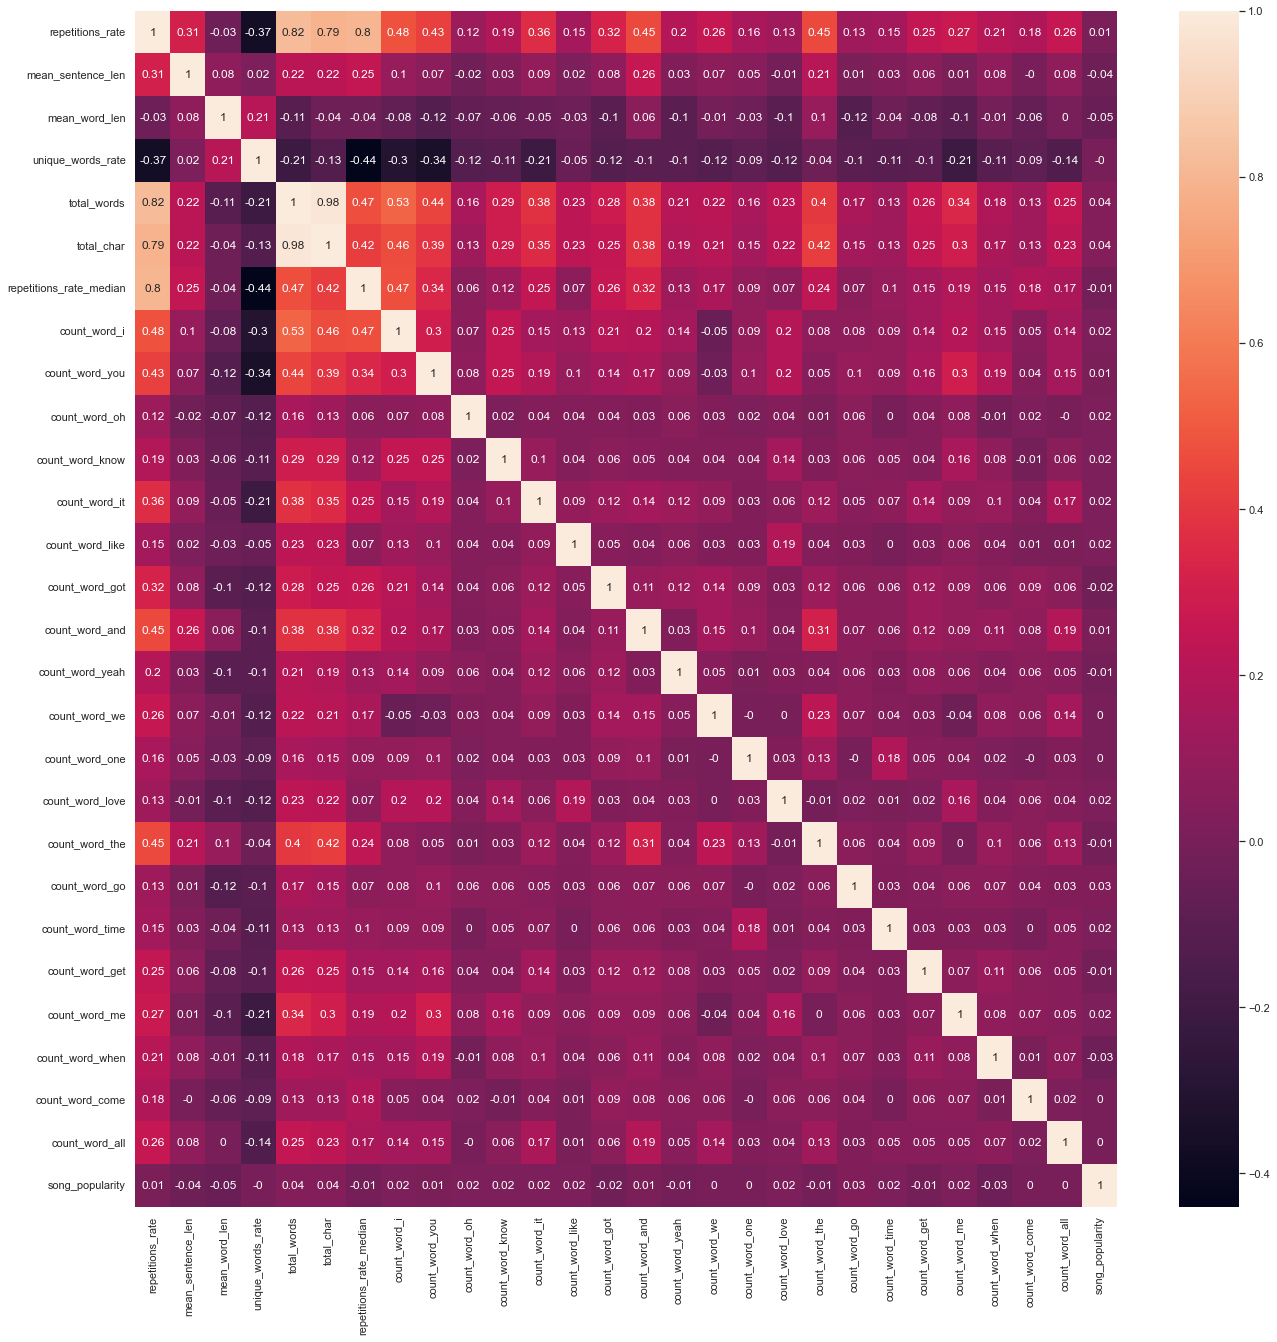

In [234]:
plt.figure(figsize=(22, 22))
heatmap = sns.heatmap(round(metrics_df.corr(), 2), annot=True)

Conclusion: no correlation with song popularity at all